In [7]:
!pip install xgboost


     -------------------------------------- 124.9/124.9 MB 1.2 MB/s eta 0:00:00


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load dataset
data = pd.read_csv('telecom_churn.csv')


In [13]:
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [15]:
# Data Preprocessing
data.fillna(method='ffill', inplace=True)  # Handle missing values


C:\Users\Admin\AppData\Local\Temp\ipykernel_7840\1354907622.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Handle missing values


In [17]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [19]:
# Scale numerical features
scaler = StandardScaler()
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = scaler.fit_transform(data[num_cols])


In [21]:
# Split data
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
print(y_train[:10])
print(y_train.dtype)


817    -0.411672
1373    2.429119
679     2.429119
56     -0.411672
1993   -0.411672
1818   -0.411672
2248   -0.411672
2899   -0.411672
468    -0.411672
2110   -0.411672
Name: Churn, dtype: float64
float64


In [27]:
threshold = 0.5  # Define an appropriate threshold
y_train = (y_train > threshold).astype(int)
y_test = (y_test > threshold).astype(int)


In [29]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [31]:
# Train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

In [33]:
# Print results
print(pd.DataFrame(results).T)

                     accuracy  precision    recall  f1_score
Logistic Regression  0.859070   0.620690  0.178218  0.276923
Decision Tree        0.884558   0.630435  0.574257  0.601036
Random Forest        0.926537   0.861111  0.613861  0.716763
XGBoost              0.923538   0.837838  0.613861  0.708571


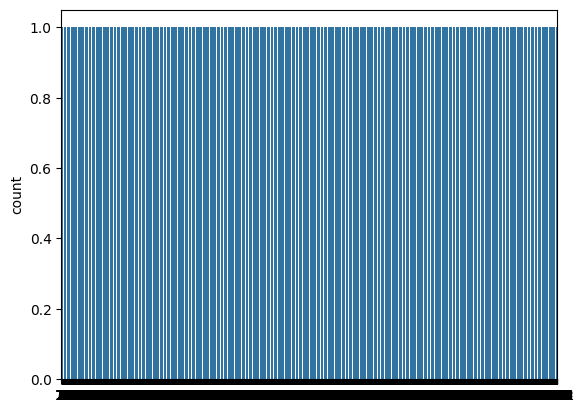

In [35]:
# EDA
sns.countplot(data['Churn'])
plt.show()